Bolded text = **do not change**

Italics text = *replace with your own words*


******************
*******************

# **Description of data**

 My dataset is about "Student's Performance in Exams." I want to analyze whether I can predict test scores in various subjects using variables of their home life: parents' education and socioeconomic status (whether or not they receive free/reduced lunch.)


*******************
*******************
# **Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

*******************
*******************
# **Functions used in notebook**

*If you write a function to help with any of your sections, please put that function here*

In [ ]:
# Functions that you develop

def remove_outliers(ser):

  Q1 = ser.quantile(.25)
  Q3 = ser.quantile(.75)
  IQR = Q3-Q1

  return np.where((ser > (Q3+(IQR*1.5))) | (ser < (Q1-(IQR*1.5))),np.nan,ser)

*******************
*******************
# **Getting data**

*Provide Pseudocode*

In [ ]:
# Code for acquiring data
data = pd.read_csv('StudentsPerformance.csv')

In [ ]:
# Display first 5 rows of data
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# Display last 5 rows of data
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [ ]:
# Show data.info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# Show data.describe
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


***************
***************
# **Visualizing data**

*Provide relevant pseudocode*

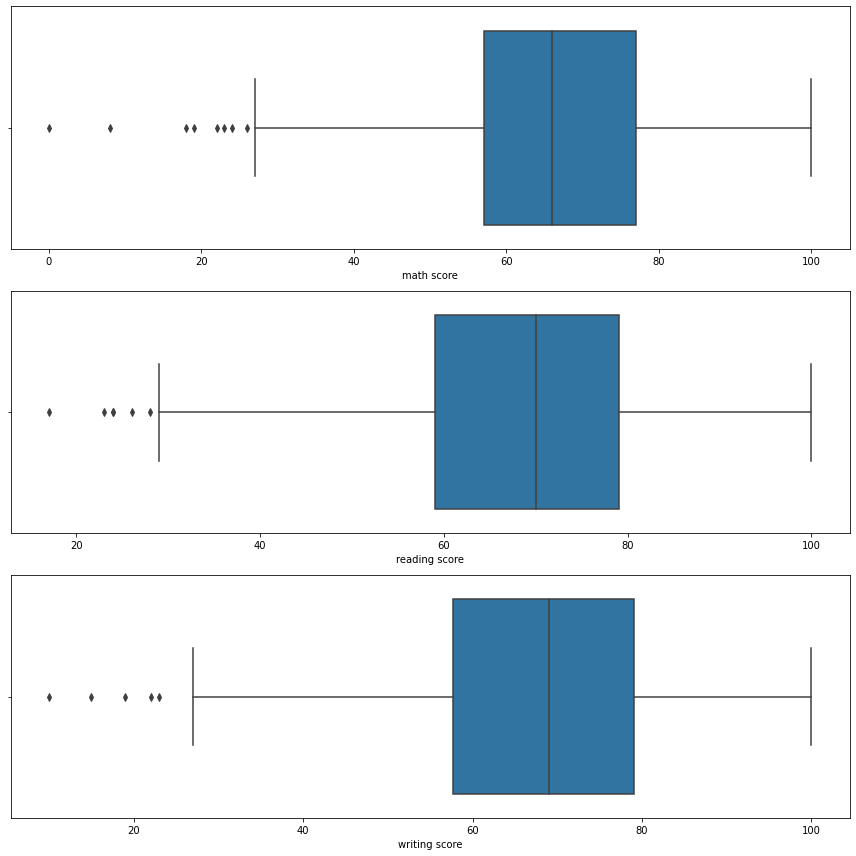

In [ ]:
# visualization 1

# original data that shows the outliers before we removed them

fig,axes = plt.subplots(3,1,figsize=(12,12))

count = 0
datalist = ['math score',	'reading score',	'writing score']
for column in datalist:
  sns.boxplot(x = data[column],ax=axes[count])
  count = count + 1
  
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


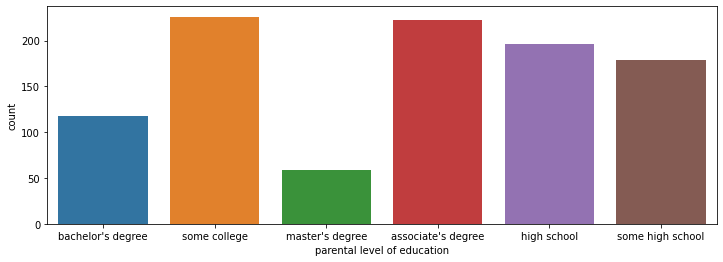

In [ ]:
# visualization 2
plt.figure(figsize=[12,4])
sns.countplot(data2['parental level of education'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


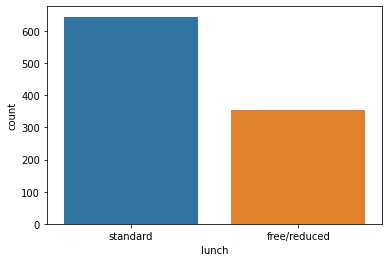

In [ ]:
# visualization 3

plt.figure(figsize=[6,4])
sns.countplot(data2['lunch'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


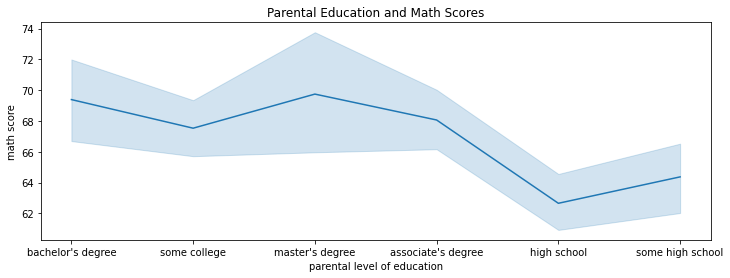

In [ ]:
# visualization 4

plt.figure(figsize=[12,4])
plt.title('Parental Education and Math Scores')
sns.lineplot(data['parental level of education'],data['math score'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


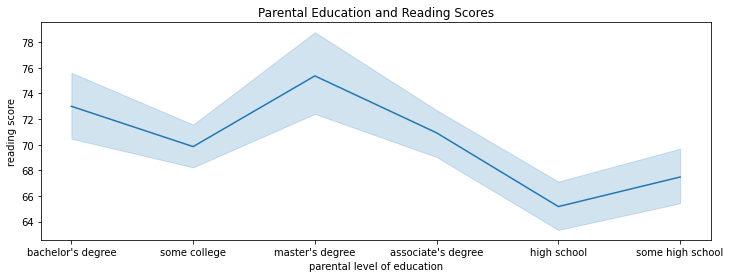

In [ ]:
# visualization 5

plt.figure(figsize=[12,4])
plt.title('Parental Education and Reading Scores')
sns.lineplot(data['parental level of education'],data['reading score'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


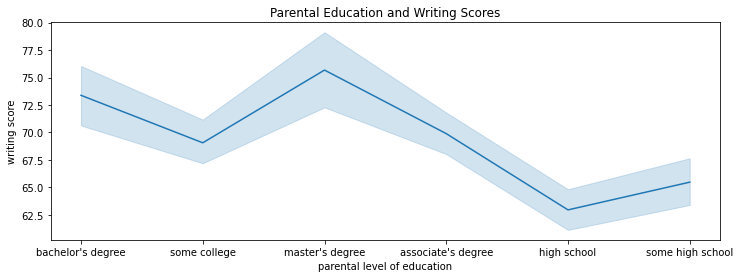

In [ ]:
# visualization 6
plt.figure(figsize=[12,4])
plt.title('Parental Education and Writing Scores')
sns.lineplot(data['parental level of education'],data['writing score'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


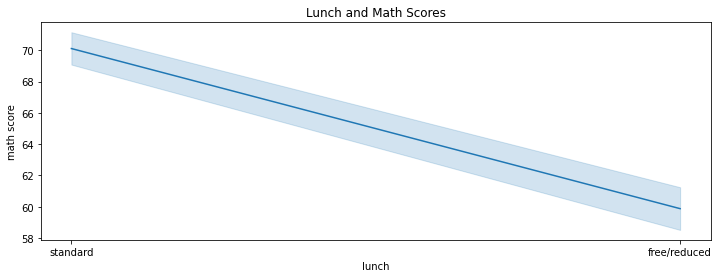

In [ ]:
# visualization 7
plt.figure(figsize=[12,4])
plt.title('Lunch and Math Scores')
sns.lineplot(data['lunch'],data['math score'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


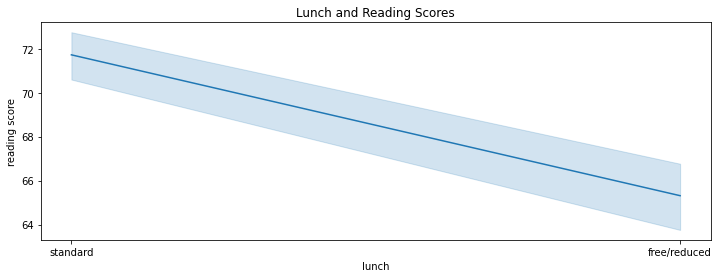

In [ ]:
# visualization 8
plt.figure(figsize=[12,4])
plt.title('Lunch and Reading Scores')
sns.lineplot(data['lunch'],data['reading score'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


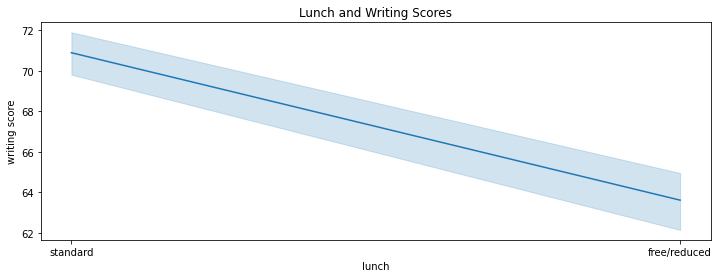

In [ ]:
# visualization 9
plt.figure(figsize=[12,4])
plt.title('Lunch and Writing Scores')
sns.lineplot(data['lunch'],data['writing score'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


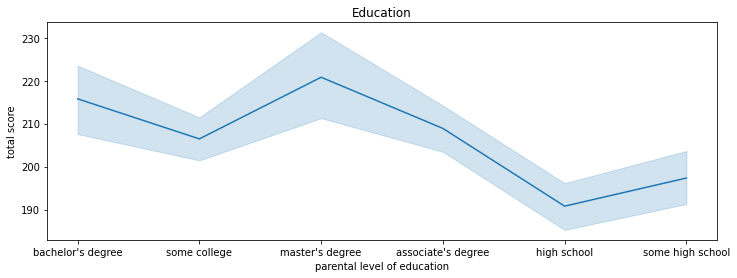

In [ ]:
# visualization 10
plt.figure(figsize=[12,4])
plt.title('Education')
sns.lineplot(data2['parental level of education'],data2['total score'])

***************
***************
# **Feature Engineering**

*If making specific choices (e.g., binning data, dummy coding, etc), please describe what you plan to do here*

*Provide relevant pseudocode*


In [ ]:
# Check and take care of null values

# there is no missing data
data.isnull().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [ ]:
# show whether there are duplicates

# there is no duplicated data
data.duplicated().any()

False

In [ ]:
# Check and take care of string values

In [ ]:
# Check and take care of outliers

# using outliers function from above:
for column in datalist:
  data[column] = remove_outliers(data[column])

# there is now missing data from where we removed the outliers
data.isnull().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                      True
reading score                   True
writing score                   True
dtype: bool

In [ ]:
# fill in the missing data with the median values
data = data.fillna(data.median())

# no more missing data
data.isnull().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [ ]:
# list variables you'll be dummy coding

#PARENTAL LEVEL OF EDUCATION
edu_df = pd.get_dummies(data['parental level of education'],drop_first=True)

# LUNCH
lunch_df = pd.get_dummies(data['lunch'],drop_first=True)

data2 = pd.concat([data,edu_df,lunch_df],axis=1)

In [ ]:
# Any additional feature engineering
data2['total score'] = data[['math score', 'reading score','writing score']].sum(axis=1)
data2

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,bachelor's degree,high school,master's degree,some college,some high school,standard,TotalScore,total score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0,1,0,0,0,0,1,218.0,218.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0,0,0,0,1,0,1,247.0,247.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0,0,0,1,0,0,1,278.0,278.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0,0,0,0,0,0,0,148.0,148.0
4,male,group C,some college,standard,none,76.0,78.0,75.0,0,0,0,1,0,1,229.0,229.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0,0,0,1,0,0,1,282.0,282.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0,0,1,0,0,0,0,172.0,172.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0,0,1,0,0,0,0,195.0,195.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0,0,0,0,1,0,1,223.0,223.0


# **6: Write a description in a text cell with what you plan to do next. Make sure you address 1) how you will handle feature engineering, 2) what kind of analysis you want to do**

What I plan to do next is write my pseudocode for each section, and make a linear regression based on the data that I've done feature engineering on. I will do this using machine learning techniques (separating into training and testing datasets).

1) The feature engineering that I have done so far is remove missing data, remove duplicate data, remove outliers and fill in the resulting missing values with the median, and dummy code the parental level of education and lunch columns. Next, I will drop the redundant columns from the original dataset and only keep the dummy coded columns.

2) The analysis that I will be doing is whether I can predict test scores in various subjects using variables of their home life: parents' education and socioeconomic status (whether or not they receive free/reduced lunch.) I will use the total of the three scores so I won't have to keep doing all three separately.

***************
***************
# **Analysis section**

*Provide relevant pseudocode for linear regression or classification*

In [ ]:
# Machine Learning 1

In [ ]:
# Machine Learning 2, if needed

***************
***************
# **Conclusions**

*Describe what you found and learned from your evaluation of your dataset*